#### Временные ряды и обработка сигналов. Лабораторная работа №1
|   Группа          |   Вариант         |   ФИО             |   
|   :------------:  |   :------------:  |   :------------:  |
|   М092501(71)     |   16 (4)          |   Шарибжанов И.Т. |

*Временной ряд* - набор данных, связанных с определенным моментом времени

*Области применения:*
- Финансовая аналитика
- Маркетинг
- Прогнозирование спроса
- Анализ временных данных о заболеваниях
- Климатические исследования
- Прогнозирование веб-трафика
- Промышленное оборудование и обслуживание

*Основные характестики временных рядов*
- Тренд - долгосрочное колебание данных (рост/спад)
- Сезонность - циклические колебания данных
- Шум - случайные колебания данных
- Цикл - долгосрочное колебание данных, не связанное с сезонностью (пример: экономический цикл)
- Стационарность - свойство ряда, при котором статические характеристики ряда (среднее, размах, мода, медиана, дисперсия) остаются постоянными с течением времени.
- Автокорреляция - корреляция между значениями ряда в разные моменты времени

Среднее арифметическое ряда - число, равное отношению суммы чисел ряда к их количеству<br>
Размах - разность между наибольшим и наименьшим элементами ряда<br>
Мода - наиболее часто встречающийся элемент ряда<br>
Медиана - серединное значение упорядоченного ряда<br>
Дисперсия-показатель разброса данных вокруг их среднего значения<br>


In [31]:
# Установка пакетов
%pip install pandas numpy matplotlib statsmodels seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import datetime

sns.set_theme(style="whitegrid")

In [ ]:
# Чтение данных
data = pd.read_csv('data/4.data-v-09-24.csv')
data

,time,people_amount
0,1.758694e+09,1
1,1.758694e+09,1
2,1.758694e+09,1
3,1.758694e+09,1
4,1.758694e+09,1
...,...,...
8583,1.758737e+09,0
8584,1.758737e+09,0
8585,1.758737e+09,0
8586,1.758737e+09,0


<Axes: xlabel='time', ylabel='people_amount'>

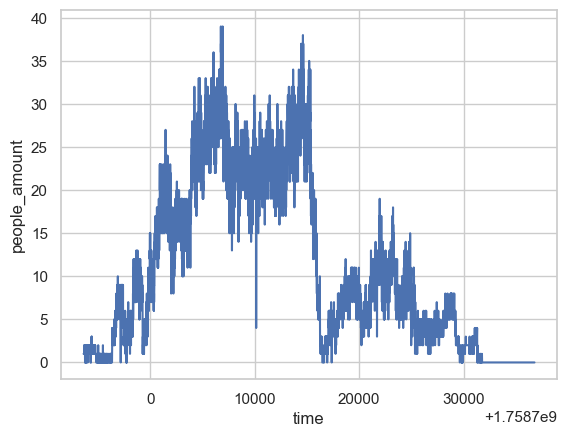

In [3]:
# Просмотр данных
sns.lineplot(x=data['time'], y=data['people_amount'])

In [4]:
# Преобразование timestamp в datetime
data['time'] = data['time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
data = data.rename(columns={'time': 'datetime'})
data

,datetime,people_amount
0,2025-09-24 09:00:00.710600,1
1,2025-09-24 09:00:05.726800,1
2,2025-09-24 09:00:10.740000,1
3,2025-09-24 09:00:15.753900,1
4,2025-09-24 09:00:20.800600,1
...,...,...
8583,2025-09-24 20:59:39.003400,0
8584,2025-09-24 20:59:44.034300,0
8585,2025-09-24 20:59:49.062100,0
8586,2025-09-24 20:59:54.075200,0


<Axes: xlabel='datetime', ylabel='people_amount'>

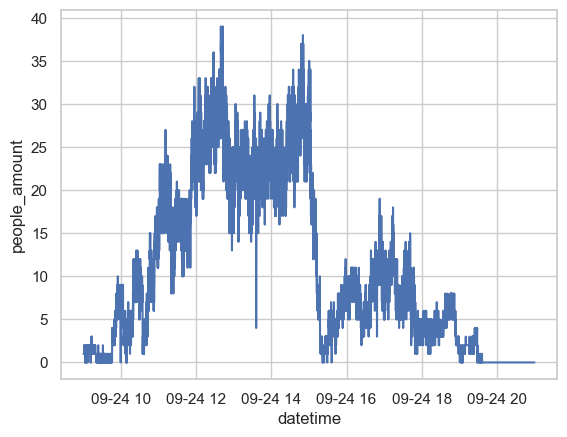

In [5]:
# Просмотр необработанных данных
sns.lineplot(x=data['datetime'], y=data['people_amount'])

In [6]:
# Проверка данных на стационарность тестом Дики-Фуллера
result = adfuller(data['people_amount'])
print('Значение: %f' % result[0])
print('Вероятность (p-value): %f' % result[1])
print('Пороговые значения:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Значение: -1.910566
Вероятность (p-value): 0.327107
Пороговые значения:
	1%: -3.431
	5%: -2.862
	10%: -2.567


*Значение тестовой статистики Дики-Фуллера:* -1.910566<br>
Отрицательное значение указывает на тенденцию к стационарности, но само по себе не является достаточным критерием

*Критические значения:*
- -1.910566 > -2.567 (10% уровень)
- -1.910566 > -2.862 (5% уровень)
- -1.910566 > -3.431 (1% уровень)

*p-value*:
0.327107 = 32.7% - вероятность получить такую статистику при условии, что ряд нестационарный (нулевая гипотеза)

0.327 > 0.05 => мы НЕ можем отклонить нулевую гипотезу о нестационарности ряда и считать его стационарным

 ----
*Нулевая гипотеза* - это предположение, которое мы тестируем и хотим опровергнуть. В тесте Дики-Фуллера:<br>
- H₀ (нулевая гипотеза): "Временной ряд НЕСТАЦИОНАРНЫЙ"
- H₁ (альтернативная гипотеза): "Временной ряд СТАЦИОНАРНЫЙ"

Уровни значимости:
- 1% уровень (-3.431):
    - Очень строгий критерий
    - Вероятность ошибочно отвергнуть H₀ = 1%
- 5% уровень (-2.862):
    - Стандартный критерий в большинстве исследований
    - Вероятность ошибочно отвергнуть H₀ = 5%
- 10% уровень (-2.567):
    - Более мягкий критерий
    - Вероятность ошибочно отвергнуть H₀ = 10%

p-value - вероятность получить наблюдаемые результаты при условии, что нулевая гипотеза верна.

Правило: p-value < 0.05 → отвергаем H₀, p-value ≥ 0.05 → не отвергаем H₀

In [7]:
# Уменьшаем частоту замеров, усредняя по пять минут
data = data.groupby(pd.Grouper(key='datetime', axis=0, freq='5min')).mean().reset_index()
data

,datetime,people_amount
0,2025-09-24 09:00:00,0.966667
1,2025-09-24 09:05:00,1.250000
2,2025-09-24 09:10:00,1.338983
3,2025-09-24 09:15:00,1.150000
4,2025-09-24 09:20:00,0.366667
...,...,...
139,2025-09-24 20:35:00,0.000000
140,2025-09-24 20:40:00,0.000000
141,2025-09-24 20:45:00,0.000000
142,2025-09-24 20:50:00,0.000000


In [ ]:
# Преобразуем данные для получения стационарного ряда
# Вычитаем тренд через скользящее среднее
data['without_trend'] = data['people_amount'] - data['people_amount'].rolling(window=6).mean()
# Дифференцирование
data['stat'] = data['without_trend'].diff(periods=1).dropna()
data

,datetime,people_amount,without_trend,stat
0,2025-09-24 09:00:00,0.966667,NaN,NaN
1,2025-09-24 09:05:00,1.250000,NaN,NaN
2,2025-09-24 09:10:00,1.338983,NaN,NaN
3,2025-09-24 09:15:00,1.150000,NaN,NaN
4,2025-09-24 09:20:00,0.366667,NaN,NaN
...,...,...,...,...
139,2025-09-24 20:35:00,0.000000,0.0,0.0
140,2025-09-24 20:40:00,0.000000,0.0,0.0
141,2025-09-24 20:45:00,0.000000,0.0,0.0
142,2025-09-24 20:50:00,0.000000,0.0,0.0


In [ ]:
# Проверка данных на стационарность после преобразований
results = [adfuller(data[x].dropna()) for x in ['without_trend', 'stat']]
print('Значение после вычитания тренда: %f' % results[0][0])
print('Вероятность (p-value) после вычитания: %f' % results[0][1])
print('Значение после дифференцирования: %f' % results[1][0])
print('Вероятность (p-value) после дифференцирования: %f' % results[1][1])

Значение после вычитания тренда: -5.256512
Вероятность (p-value) после вычитания: 0.000007
Значение после дифференцирования: -4.620902
Вероятность (p-value) после дифференцирования: 0.000118


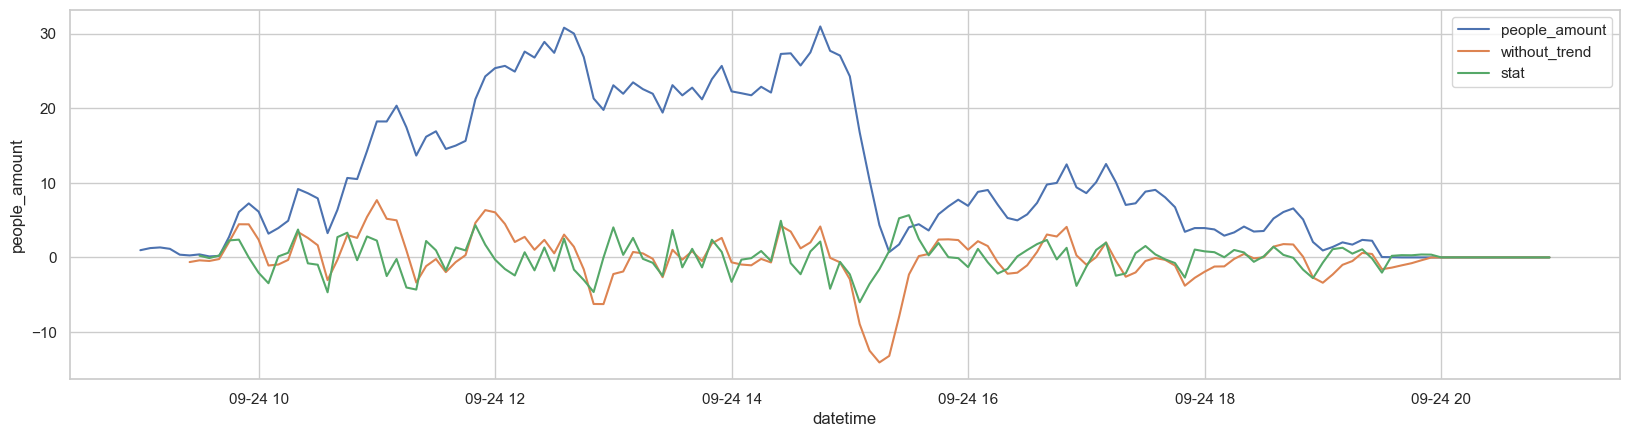

In [8]:
# Просмотр данных
ax = sns.lineplot(x=data['datetime'], y=data['people_amount'], label='people_amount')
sns.lineplot(x=data['datetime'], y=data['without_trend'], label='without_trend', ax=ax)
sns.lineplot(x=data['datetime'], y=data['stat'], label='stat', ax=ax)
ax.figure.set_figwidth(20)

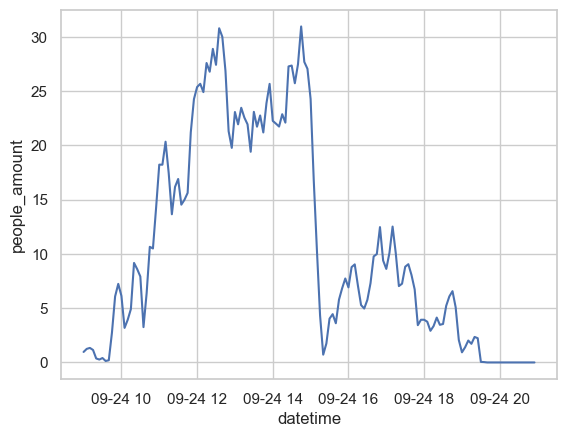

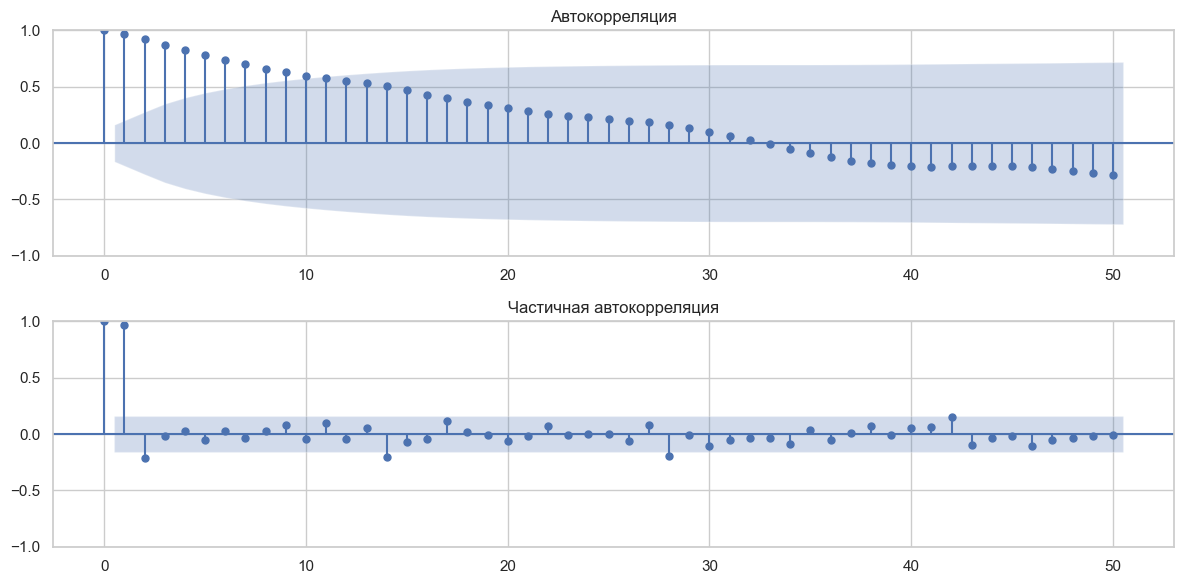

In [ ]:
# Просмотр данных
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
sns.lineplot(x=data['datetime'], y=data['people_amount'])

# Рассчитываем автокорреляцию и частичную автокорреляцию
import matplotlib.pyplot as plt  # для передачи ax в statsmodels
fig, axes = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(data['people_amount'], lags=50, ax=axes[0])
axes[0].set_title('Автокорреляция')
plot_pacf(data['people_amount'], lags=50, ax=axes[1])
axes[1].set_title('Частичная автокорреляция')
fig.tight_layout()

In [12]:
# Вспомогательная оценка ACF/PACF и рекомендация (p, q)
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# statsmodels строит коррелограммы на осях matplotlib, импортируем локально только для осей
import matplotlib.pyplot as plt


def _significant_lags(values: np.ndarray, confint: np.ndarray) -> np.ndarray:
    """Возвращает индексы лагов, где доверительный интервал не содержит 0 (значимы)."""
    lower = confint[:, 0]
    upper = confint[:, 1]
    mask = (lower > 0) | (upper < 0)
    # лаг 0 исключаем
    mask[0] = False
    return np.where(mask)[0]


def recommend_orders(series: pd.Series, max_lags: int = 40) -> tuple[int, int]:
    """Грубая рекомендация p и q по шаблонам значимости PACF/ACF.
    Возвращает (p, q)."""
    nlags = min(max_lags, max(5, len(series) // 4))
    acf_vals, acf_ci = acf(series, nlags=nlags, alpha=0.05, fft=True)
    pacf_vals, pacf_ci = pacf(series, nlags=nlags, alpha=0.05, method="yw")

    sig_acf = _significant_lags(acf_vals, acf_ci)
    sig_pacf = _significant_lags(pacf_vals, pacf_ci)

    # эвристика: берём максимальный значимый лаг в пределах первых 10
    p_candidates = [lag for lag in sig_pacf if lag <= 10]
    q_candidates = [lag for lag in sig_acf if lag <= 10]
    p = int(max(p_candidates)) if p_candidates else 0
    q = int(max(q_candidates)) if q_candidates else 0
    return p, q


def detect_seasonal_period(series: pd.Series, max_lags: int = 60, min_corr: float = 0.3) -> int | None:
    """Простейшая эвристика: пик ACF на лагах >=2. Если корреляция достаточно велика — считаем это периодом."""
    nlags = min(max_lags, max(10, len(series) // 6))
    acf_vals = acf(series, nlags=nlags, fft=True)
    # игнорируем лаги 0 и 1
    search = acf_vals[2:]
    if len(search) == 0:
        return None
    s = int(np.argmax(search)) + 2
    return s if acf_vals[s] >= min_corr else None


def analyze_acf_pacf(series: pd.Series, max_lags: int = 40, seasonal_period: int | None = None) -> None:
    """Строит ACF/PACF и печатает рекомендации p, q для исходного, d=1 и (опц.) сезонно-дифференцированного ряда."""
    series = pd.Series(series).dropna()

    # Подготовим варианты рядов
    variants: list[tuple[str, pd.Series]] = [("Исходный", series)]
    d1 = series.diff().dropna()
    if not d1.empty:
        variants.append(("d=1", d1))

    if seasonal_period is None:
        seasonal_period = detect_seasonal_period(series)
    if seasonal_period and seasonal_period >= 2:
        ds = series.diff(seasonal_period).dropna()
        if not ds.empty:
            variants.append((f"seasonal diff s={seasonal_period}", ds))

    # Графики ACF/PACF для каждого варианта
    for title, s in variants:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        plot_acf(s, lags=max_lags, ax=axes[0])
        axes[0].set_title(f"ACF — {title}")
        plot_pacf(s, lags=max_lags, ax=axes[1])
        axes[1].set_title(f"PACF — {title}")
        fig.tight_layout()

    # Рекомендации p, q для каждого варианта
    print("Рекомендации по порядкам (p, q):")
    for title, s in variants:
        p, q = recommend_orders(s, max_lags=max_lags)
        print(f"- {title}: p={p}, q={q}")

    if seasonal_period:
        print(f"Обнаруженная сезонность: s={seasonal_period} (по пику ACF)")

Рекомендации по порядкам (p, q):
- Исходный: p=2, q=10
- d=1: p=1, q=1
- seasonal diff s=2: p=6, q=1
Обнаруженная сезонность: s=2 (по пику ACF)
Рекомендации ARIMA: p=1, d=1, q=1
Обнаружена сезонность: s=2


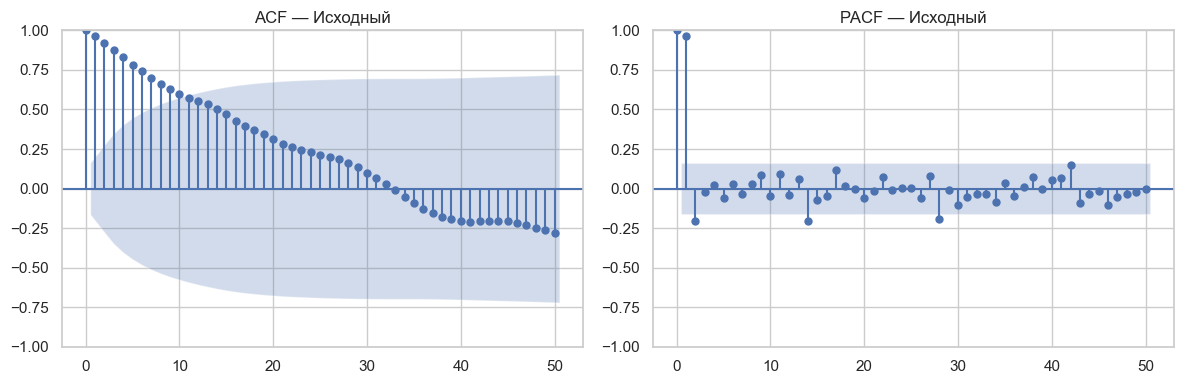

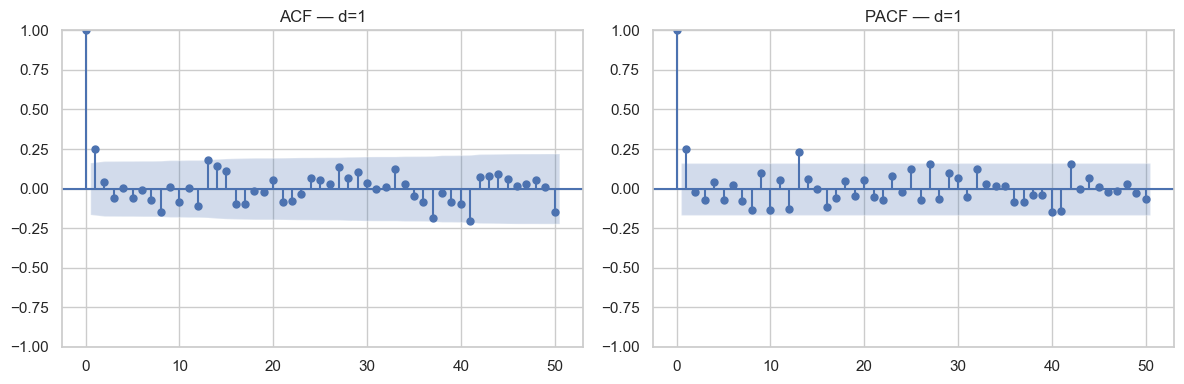

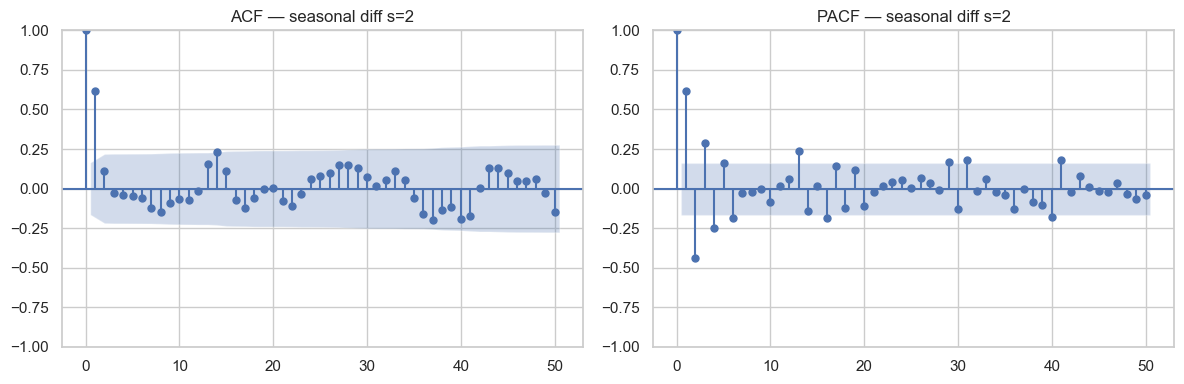

In [ ]:
# Анализ ACF/PACF и сохранение рекомендаций для ARIMA
series = data['people_amount']

# 1) Определим d по ADF: если p-value > 0.05, возьмём d=1
adf_stat, adf_pvalue, *_ = adfuller(series.dropna())
arima_d = 1 if adf_pvalue > 0.05 else 0

# 2) Прикинем сезонность (s) — опционально
seasonal_period = detect_seasonal_period(series)
arima_s = seasonal_period if seasonal_period and seasonal_period >= 2 else None

# 3) Визуальный анализ ACF/PACF (исходный, d=1, и, если есть, сезонный дифф)
analyze_acf_pacf(series, max_lags=50, seasonal_period=arima_s)

# 4) Рекомендации p, q на стационарном преобразовании (d применяем при необходимости)
work_series = series.diff(arima_d).dropna() if arima_d > 0 else series.dropna()
arima_p, arima_q = recommend_orders(work_series, max_lags=50)

print(f"Рекомендации ARIMA: p={arima_p}, d={arima_d}, q={arima_q}")
if arima_s:
    print(f"Обнаружена сезонность: s={arima_s}")

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Обучение модели ARIMA
model = ARIMA(series, order=(arima_p, arima_d, arima_q))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          people_amount   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -308.820
Date:                Mon, 06 Oct 2025   AIC                            623.640
Time:                        19:02:01   BIC                            632.529
Sample:                             0   HQIC                           627.252
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1985      0.290      0.685      0.493      -0.370       0.767
ma.L1          0.0554      0.307      0.181      0.857      -0.546       0.656
sigma2         4.3966      0.479      9.173      0.0

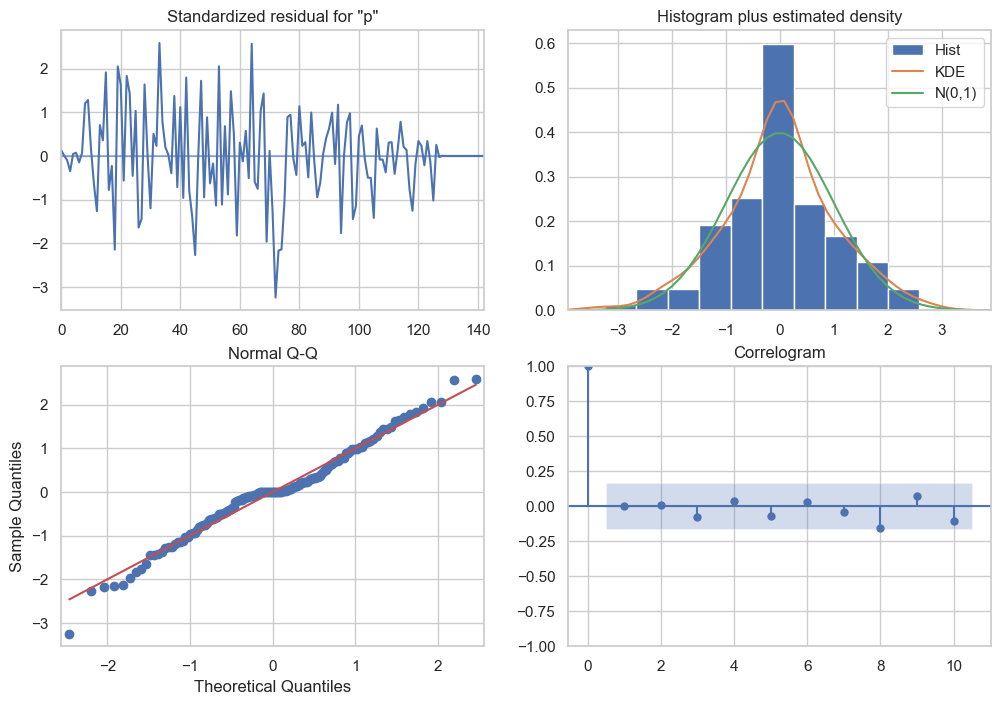

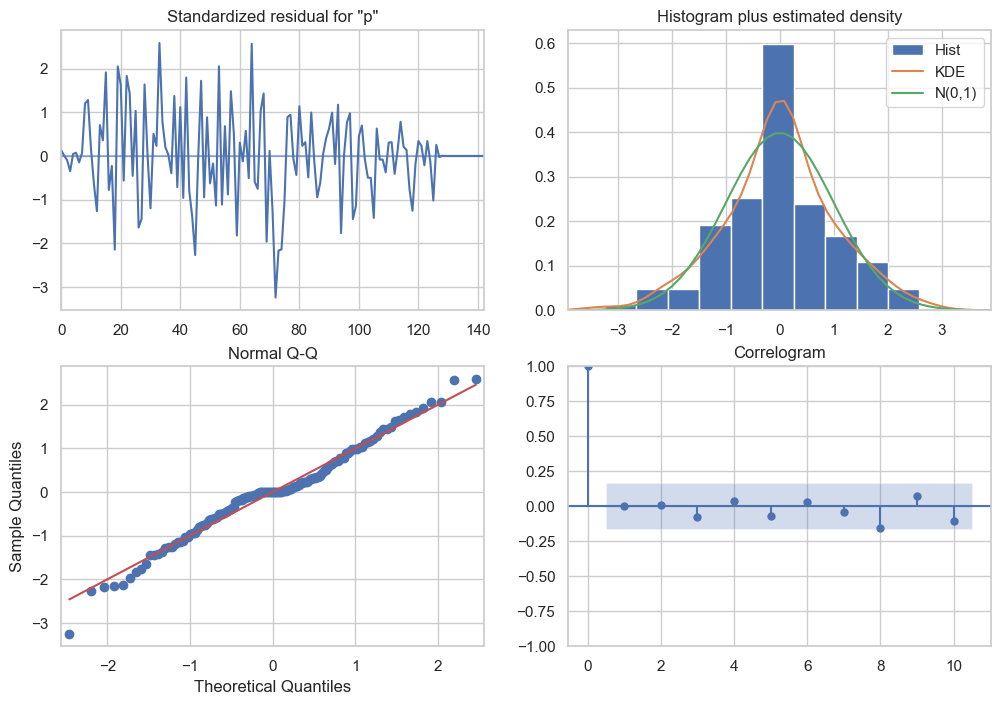

In [ ]:
# Построение диаграмм для оценки модели
model_fit.plot_diagnostics(figsize=(12, 8))

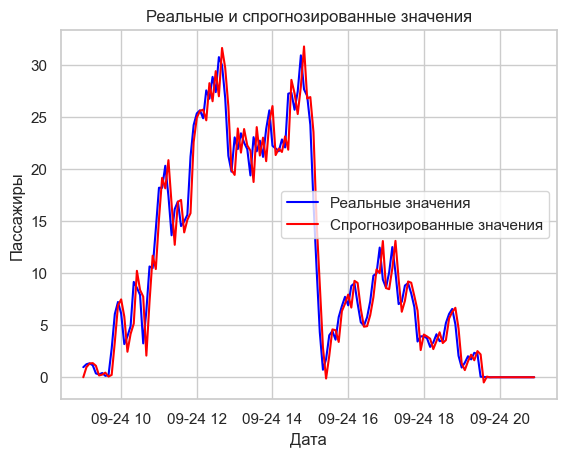

In [16]:
# Сравнение реальных и спрогнозированных значений
st_pred = model_fit.get_prediction()
forecast_values = st_pred.predicted_mean
ax = sns.lineplot(x=data['datetime'], y=data['people_amount'], label='Реальные значения', color='blue')
sns.lineplot(x=data['datetime'], y=forecast_values, label='Спрогнозированные значения', color='red', ax=ax)
ax.set_title('Реальные и cпрогнозированные значения')
ax.set_xlabel('Дата')
ax.set_ylabel('Пассажиры')
ax.legend()